In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.laguerre import laggauss
from numpy import linalg
from scipy.stats import norm

We want to solve a Fredholm integral equation of the second kind, of the form:

$u(x) = \int_{0}^{\infty} K(x, t) u(t) dt + f(x)$

We'll approach it by using Gauss-Laguerre quadrature to approximate the integral (note that we have to insert $\exp(t)$ to cancel the implicit $\exp(-t)$ weighting function of the G-L quadrature.):

$u(x) \approx \sum_{j=1}^{n} w_j \exp(t_j) K(x, t_j) u(t_j) + f(x)$

If we evaluate $u$ at the quadrature points ($u_i = u(x_i)$), we get a linear system:

$u_i \approx \sum_{j=1}^{n} w_j \exp(x_j) K(x_i, x_j) u_j + f(x_i)$

In matrix form, we have:

$A \vec{u} = \vec{b}$

$A_{i,j} = \delta_{i,j} - w_j exp(x_j) K(x_i, x_j)$

$b_i = f(x_i)$

We can solve this for $\vec{u}$. Then to get the continuous function $u(x)$, we can substitute $\vec{u}$ into the right-hand side of the approximation above:

$u(x) \approx \sum_{j=1}^{n} w_j \exp(t_j) K(x, t_j) u_j + f(x)$

In [32]:
def solve_fredholm(k, f, n):
    x, w = laggauss(n)
    A = np.eye(n) - w * np.exp(x) * k(x[:,None], x)
    b = f(x)
    u = linalg.solve(A, b)
    def soln(y):
        return np.dot(w * np.exp(x) * k(y[:,None], x), u) + f(y)
    return soln

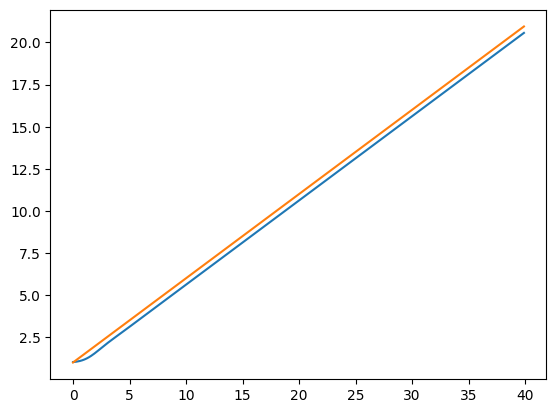

In [79]:
mu = -2
sigma = 1

xmax = 40
xplot = np.arange(0, xmax, 0.1)
k = lambda x, t: norm(loc=mu, scale=sigma).pdf(t - x)
f = np.ones_like

n = 185
plt.plot(xplot, solve_fredholm(k, f, n)(xplot))
plt.plot(xplot, 1 + xplot / (-mu))

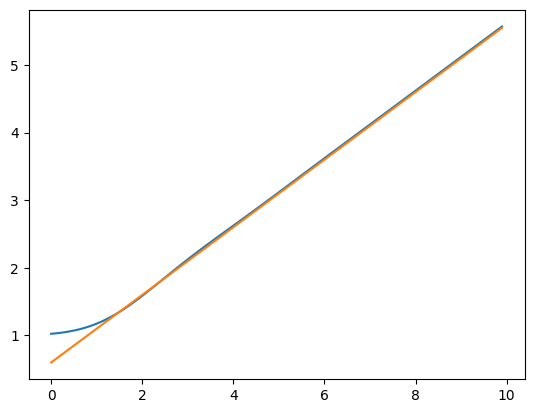

In [101]:
mu = -2
sigma = 1

xmax = 10
xplot = np.arange(0, xmax, 0.1)
k = lambda x, t: norm(loc=mu, scale=sigma).pdf(t - x)
f = np.ones_like

n = 185
a = 0.6
plt.plot(xplot, solve_fredholm(k, f, n)(xplot))
plt.plot(xplot, a + xplot / (-mu))

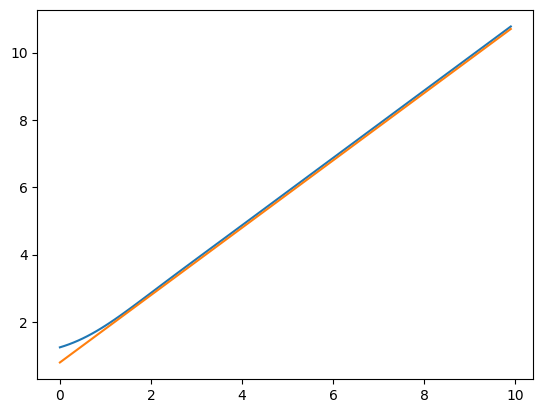

In [105]:
mu = -1
sigma = 1

xmax = 10
xplot = np.arange(0, xmax, 0.1)
k = lambda x, t: norm(loc=mu, scale=sigma).pdf(t - x)
f = np.ones_like

n = 185
a = 0.8
plt.plot(xplot, solve_fredholm(k, f, n)(xplot))
plt.plot(xplot, a + xplot / (-mu))

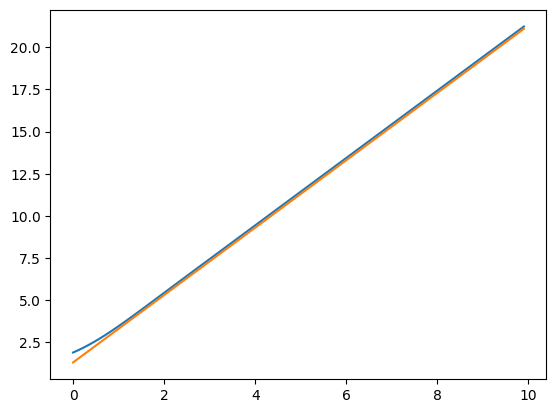

In [111]:
mu = -1/2
sigma = 1

xmax = 10
xplot = np.arange(0, xmax, 0.1)
k = lambda x, t: norm(loc=mu, scale=sigma).pdf(t - x)
f = np.ones_like

n = 185
a = 1.3
plt.plot(xplot, solve_fredholm(k, f, n)(xplot))
plt.plot(xplot, a + xplot / (-mu))

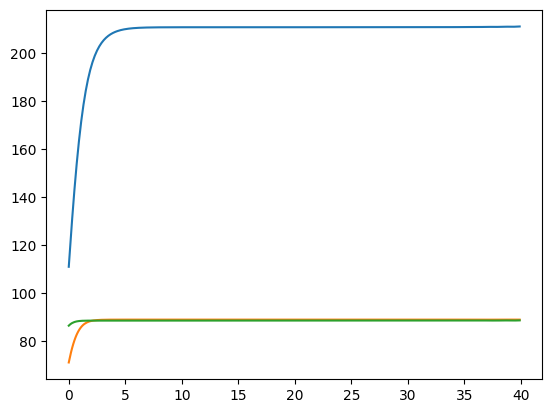

In [77]:
sigma = 1

xmax = 40
xplot = np.arange(0, xmax, 0.1)

for mu in [1/2, 1, 2]:
    k = lambda x, t: norm(loc=mu, scale=sigma).pdf(t - x)
    f = np.ones_like

    n = 185
    plt.plot(xplot, solve_fredholm(k, f, n)(xplot) - (xplot / (-mu)))


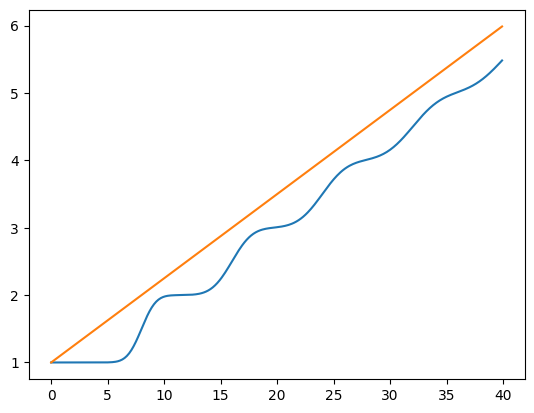

In [49]:
mu = -8
sigma = 1

xmax = 40
xplot = np.arange(0, xmax, 0.1)
k = lambda x, t: norm(loc=mu, scale=sigma).pdf(t - x)
f = np.ones_like

n = 185
plt.plot(xplot, solve_fredholm(k, f, n)(xplot))
plt.plot(xplot, 1 + xplot / (-mu))

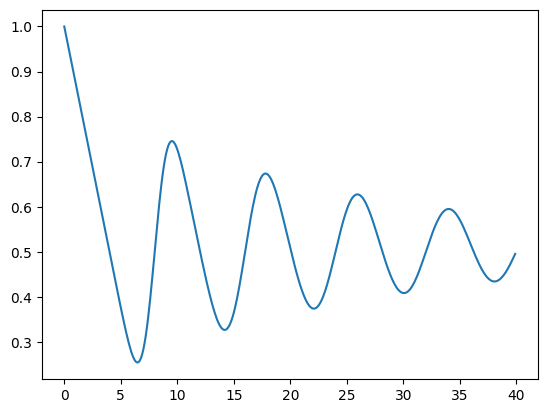

In [60]:
mu = -8
sigma = 1

xmax = 40
xplot = np.arange(0, xmax, 0.1)
k = lambda x, t: norm(loc=mu, scale=sigma).pdf(t - x)
f = np.ones_like

n = 185
plt.plot(xplot, solve_fredholm(k, f, n)(xplot) - (xplot / (-mu)))

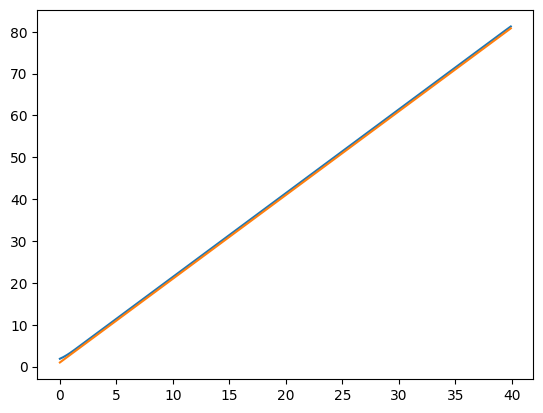

In [47]:
mu = -1/2
sigma = 1

xmax = 40
xplot = np.arange(0, xmax, 0.1)
k = lambda x, t: norm(loc=mu, scale=sigma).pdf(t - x)
f = np.ones_like

n = 185
plt.plot(xplot, solve_fredholm(k, f, n)(xplot))
plt.plot(xplot, 1 + xplot / (-mu))

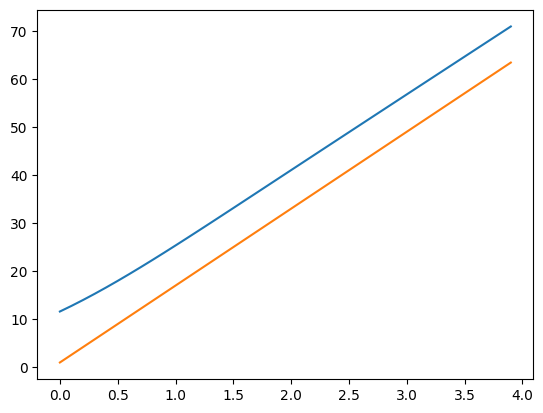

In [136]:
mu = -1/16
sigma = 1

xmax = 4
xplot = np.arange(0, xmax, 0.1)
k = lambda x, t: norm(loc=mu, scale=sigma).pdf(t - x)
f = np.ones_like

n = 185
plt.plot(xplot, solve_fredholm(k, f, n)(xplot))
plt.plot(xplot, 1 + xplot / (-mu))

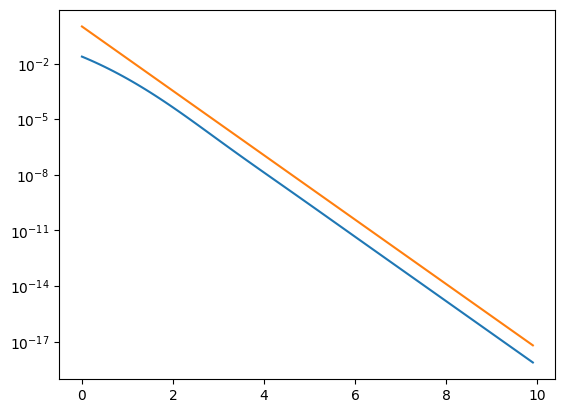

In [81]:
mu = 2
sigma = 1

xmax = 10
x = np.arange(0, xmax, 0.1)

k = lambda x, t: norm(loc=mu, scale=sigma).pdf(t - x)
f = norm(loc=-mu, scale=sigma).sf

n = 185
plt.semilogy(x, solve_fredholm(k, f, n)(x))
plt.semilogy(x, np.exp(-2 * mu * x / sigma**2))

# plt.plot(xplot, xplot / (-mu))

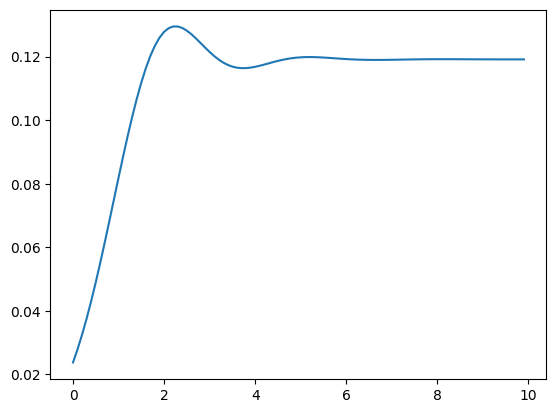

In [82]:
mu = 2
sigma = 1

xmax = 10
x = np.arange(0, xmax, 0.1)

k = lambda x, t: norm(loc=mu, scale=sigma).pdf(t - x)
f = norm(loc=-mu, scale=sigma).sf

n = 185
plt.plot(x, solve_fredholm(k, f, n)(x) / np.exp(-2 * mu * x / sigma**2))

# plt.plot(xplot, xplot / (-mu))

In [155]:
def theory_nt(x, mu, sigma):
    return (norm.cdf(-mu/sigma) / norm.cdf(mu/sigma)) * np.exp(-2 * mu * x / sigma**2)

def theory_t(x, mu, sigma):
    a = 1 + np.abs(sigma/mu) * norm.pdf(np.abs(mu/sigma)) / norm.cdf(np.abs(mu/sigma))
    return - (1/mu) * x + a

def k(mu, sigma):
    return lambda x, t: norm(loc=mu, scale=sigma).pdf(t - x)

def f_nt(mu, sigma):
    return norm(loc=-mu, scale=sigma).sf

def f_t():
    return np.ones_like

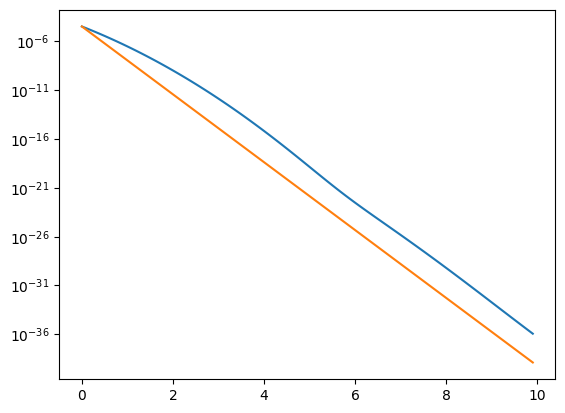

In [173]:
mu = 4
sigma = 1
n = 185

soln = solve_fredholm(k(mu, sigma), f_nt(mu, sigma), n)

xmax = 10
x = np.arange(0, xmax, 0.1)

plt.semilogy(x, soln(x))
plt.semilogy(x, theory_nt(x, mu, sigma))

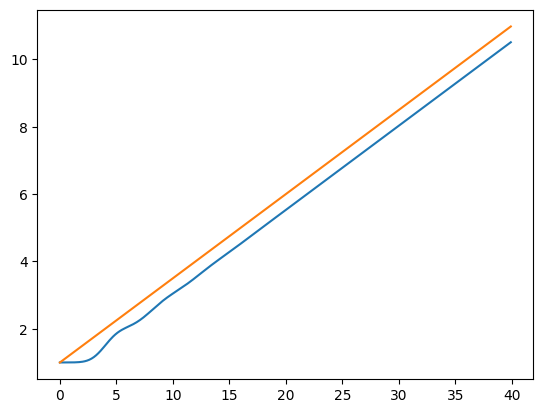

In [166]:
mu = -4
sigma = 1
n = 185

soln = solve_fredholm(k(mu, sigma), f_t(), n)

xmax = 40
x = np.arange(0, xmax, 0.1)

plt.plot(x, soln(x))
plt.plot(x, theory_t(x, mu, sigma))

(0.0, 5.0)

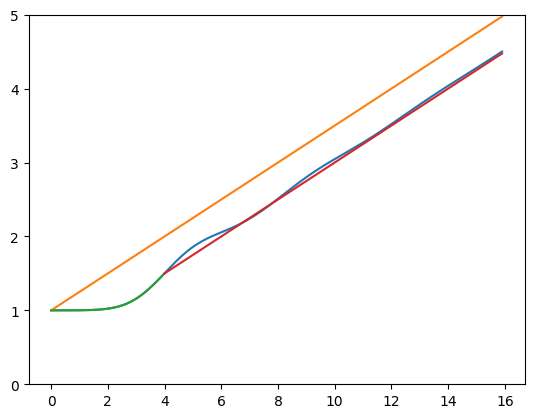

In [250]:
mu = -4
sigma = 1
n = 185

soln = solve_fredholm(k(mu, sigma), f_t(), n)

xmax = 16
x = np.arange(0, xmax, 0.1)

plt.plot(x, soln(x))
plt.plot(x, theory_t(x, mu, sigma))
plt.plot(x[x<=-mu], 1 + norm.cdf((x[x<=-mu]+mu)/sigma))
plt.plot(x[x>=-mu], -x[x>=-mu]/mu + 1/2)
plt.ylim([0,1 - xmax/mu])

(0.0, 4.0)

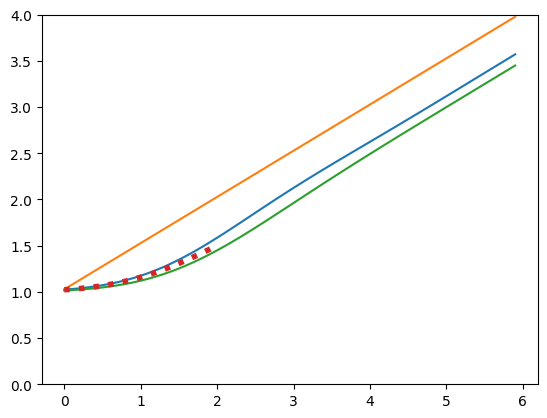

In [332]:
mu = -2
sigma = 1
n = 185

soln = solve_fredholm(k(mu, sigma), f_t(), n)

xmax = 6
x = np.arange(0, xmax, 0.1)

plt.plot(x, soln(x))
plt.plot(x, theory_t(x, mu, sigma))
# a = 1 + np.abs(sigma/mu) * norm.pdf(np.abs(mu/sigma)) / norm.cdf(np.abs(mu/sigma))
a = 1/2
plt.plot(x, 1 - (sigma/mu)*norm.pdf((x+mu)/sigma) + (- (x/mu) + a - 1)*norm.cdf((x+mu)/sigma))
plt.plot(x[x<=-mu], 1 + norm.cdf((x[x<=-mu]+mu)/sigma), ':', lw=4)
plt.ylim([0,1 - xmax/mu])

In [461]:
def a_opt(x):
    return 1/2 + 1/(2*x) - (1/x)*norm.pdf(1/2 + x/2) / norm.cdf(-(1/2 + x/2))

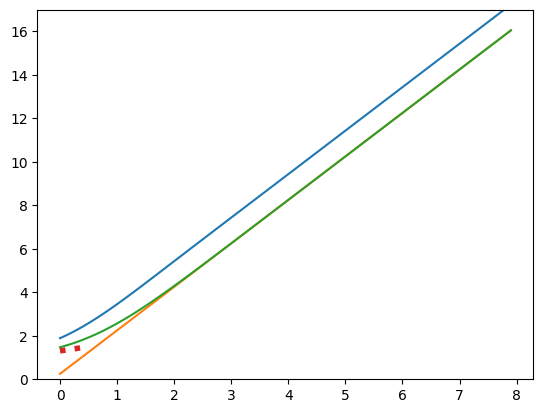

1.4271079588328082
1.2821555407361296


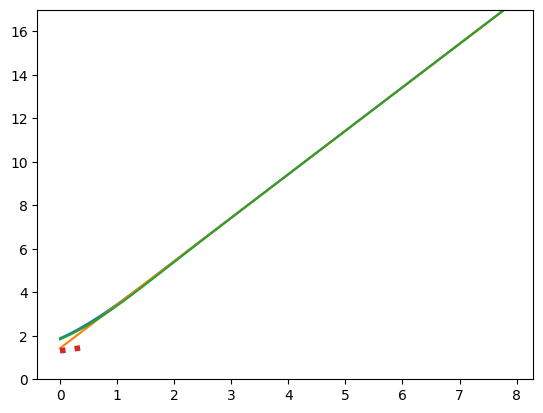

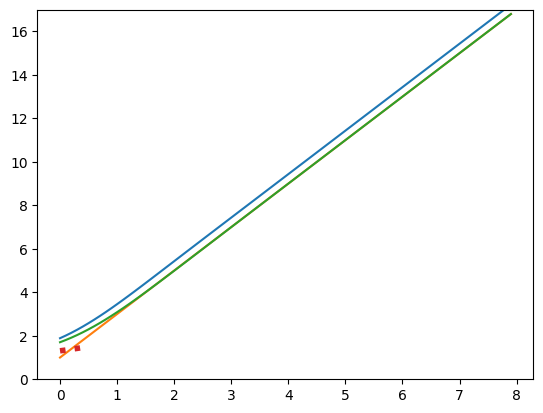

In [468]:
mu = -1/2
sigma = 1
n = 185

soln = solve_fredholm(k(mu, sigma), f_t(), n)

xmax = 8
x = np.arange(0, xmax, 0.1)

a = 1/4
plt.plot(x, soln(x))
plt.plot(x, -(x/mu) + a)
plt.plot(x, 1 - (sigma/mu)*norm.pdf((x+mu)/sigma) + (- (x/mu) + a - 1)*norm.cdf((x+mu)/sigma))
plt.plot(x[x<=-mu], 1 + norm.cdf((x[x<=-mu]+mu)/sigma), ':', lw=4)
plt.ylim([0,1 - xmax/mu])
plt.show()

a = a_opt(mu/sigma)
print(a)
print(-sigma / mu * (norm.pdf(1/2) / norm.cdf(-1/2) - 1/2))
plt.plot(x, soln(x))
plt.plot(x, -(x/mu) + a)
plt.plot(x, 1 - (sigma/mu)*norm.pdf((x+mu)/sigma) + (- (x/mu) + a - 1)*norm.cdf((x+mu)/sigma))
plt.plot(x[x<=-mu], 1 + norm.cdf((x[x<=-mu]+mu)/sigma), ':', lw=4)
plt.ylim([0,1 - xmax/mu])
plt.show()

a = 1
plt.plot(x, soln(x))
plt.plot(x, -(x/mu) + a)
plt.plot(x, 1 - (sigma/mu)*norm.pdf((x+mu)/sigma) + (- (x/mu) + a - 1)*norm.cdf((x+mu)/sigma))
plt.plot(x[x<=-mu], 1 + norm.cdf((x[x<=-mu]+mu)/sigma), ':', lw=4)
plt.ylim([0,1 - xmax/mu])
plt.show()



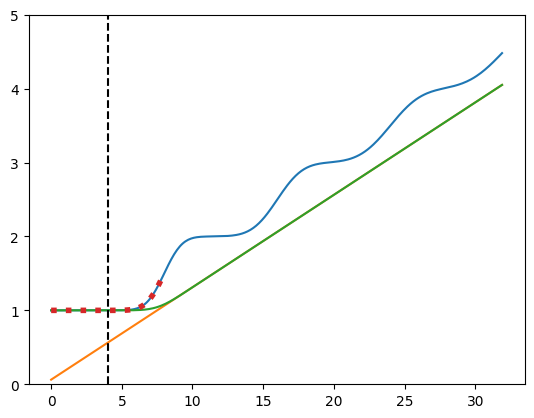

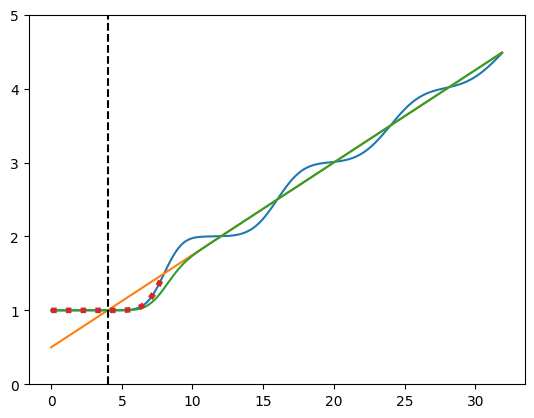

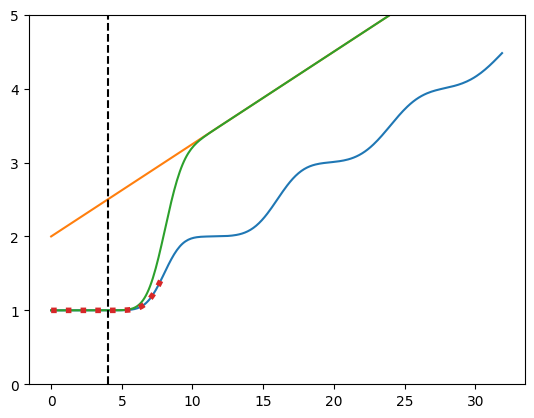

In [440]:
mu = -8
sigma = 1
n = 185

soln = solve_fredholm(k(mu, sigma), f_t(), n)

xmax = 32
x = np.arange(0, xmax, 0.1)

a = 1/16
plt.plot(x, soln(x))
plt.plot(x, -(x/mu) + a)
plt.plot(x, 1 - (sigma/mu)*norm.pdf((x+mu)/sigma) + (- (x/mu) + a - 1)*norm.cdf((x+mu)/sigma))
plt.plot(x[x<=-mu], 1 + norm.cdf((x[x<=-mu]+mu)/sigma), ':', lw=4)
plt.vlines((-mu) / 2, 0, 1 - xmax/mu, 'k', linestyle='dashed')
plt.ylim([0,1 - xmax/mu])
plt.show()

a = 1/2
plt.plot(x, soln(x))
plt.plot(x, -(x/mu) + a)
plt.plot(x, 1 - (sigma/mu)*norm.pdf((x+mu)/sigma) + (- (x/mu) + a - 1)*norm.cdf((x+mu)/sigma))
plt.plot(x[x<=-mu], 1 + norm.cdf((x[x<=-mu]+mu)/sigma), ':', lw=4)
plt.vlines((-mu) / 2, 0, 1 - xmax/mu, 'k', linestyle='dashed')
plt.ylim([0,1 - xmax/mu])
plt.show()

a = 2
plt.plot(x, soln(x))
plt.plot(x, -(x/mu) + a)
plt.plot(x, 1 - (sigma/mu)*norm.pdf((x+mu)/sigma) + (- (x/mu) + a - 1)*norm.cdf((x+mu)/sigma))
plt.plot(x[x<=-mu], 1 + norm.cdf((x[x<=-mu]+mu)/sigma), ':', lw=4)
plt.vlines((-mu) / 2, 0, 1 - xmax/mu, 'k', linestyle='dashed')
plt.ylim([0,1 - xmax/mu])
plt.show()



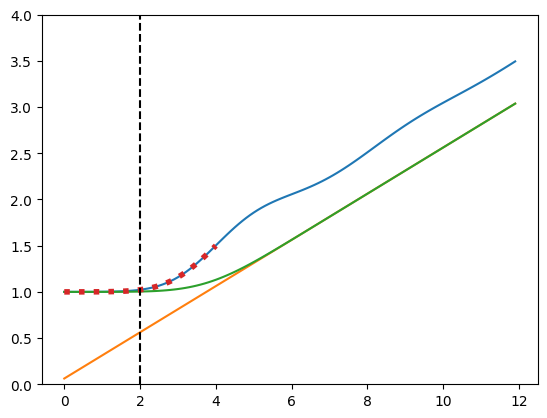

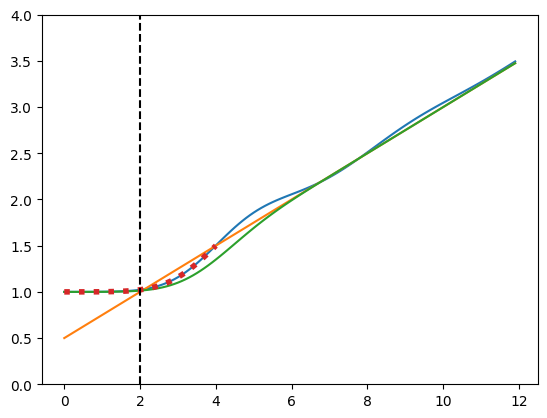

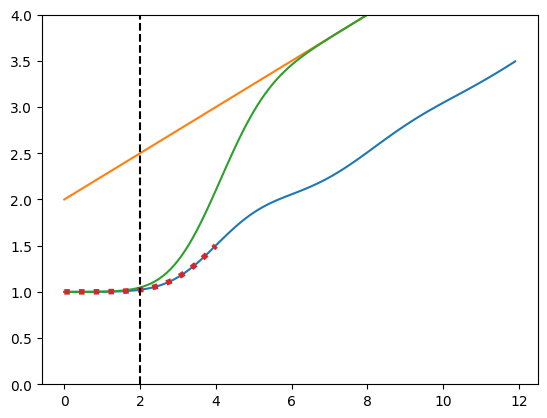

In [439]:
mu = -4
sigma = 1
n = 185

soln = solve_fredholm(k(mu, sigma), f_t(), n)

xmax = 12
x = np.arange(0, xmax, 0.1)

a = 1/16
plt.plot(x, soln(x))
plt.plot(x, -(x/mu) + a)
plt.plot(x, 1 - (sigma/mu)*norm.pdf((x+mu)/sigma) + (- (x/mu) + a - 1)*norm.cdf((x+mu)/sigma))
plt.plot(x[x<=-mu], 1 + norm.cdf((x[x<=-mu]+mu)/sigma), ':', lw=4)
plt.vlines((-mu) / 2, 0, 1 - xmax/mu, 'k', linestyle='dashed')
plt.ylim([0,1 - xmax/mu])
plt.show()

a = 1/2
plt.plot(x, soln(x))
plt.plot(x, -(x/mu) + a)
plt.plot(x, 1 - (sigma/mu)*norm.pdf((x+mu)/sigma) + (- (x/mu) + a - 1)*norm.cdf((x+mu)/sigma))
plt.plot(x[x<=-mu], 1 + norm.cdf((x[x<=-mu]+mu)/sigma), ':', lw=4)
plt.vlines((-mu) / 2, 0, 1 - xmax/mu, 'k', linestyle='dashed')
plt.ylim([0,1 - xmax/mu])
plt.show()

a = 2
plt.plot(x, soln(x))
plt.plot(x, -(x/mu) + a)
plt.plot(x, 1 - (sigma/mu)*norm.pdf((x+mu)/sigma) + (- (x/mu) + a - 1)*norm.cdf((x+mu)/sigma))
plt.plot(x[x<=-mu], 1 + norm.cdf((x[x<=-mu]+mu)/sigma), ':', lw=4)
plt.vlines((-mu) / 2, 0, 1 - xmax/mu, 'k', linestyle='dashed')
plt.ylim([0,1 - xmax/mu])
plt.show()



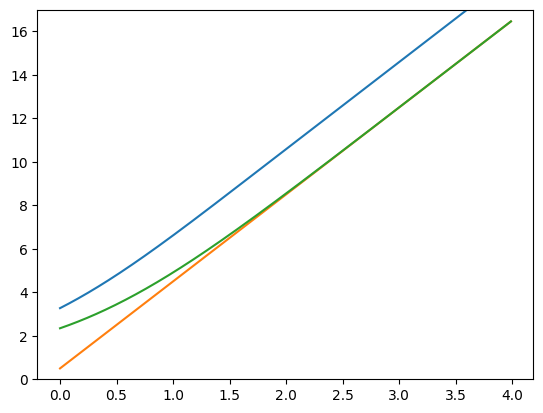

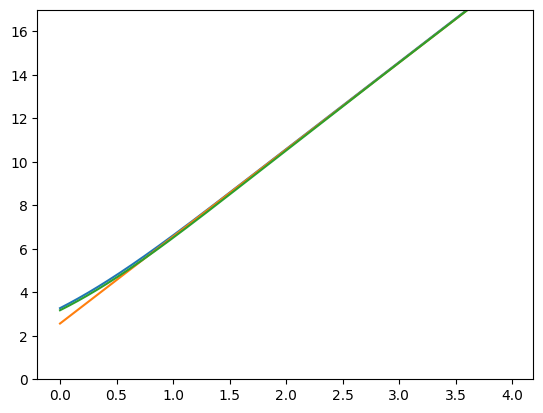

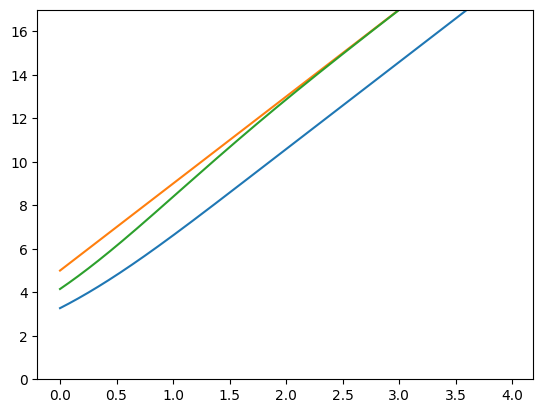

In [451]:
mu = -1/4
sigma = 1
n = 185

soln = solve_fredholm(k(mu, sigma), f_t(), n)

xmax = 4
x = np.arange(0, xmax, 0.01)

a = 1/2
plt.plot(x, soln(x))
plt.plot(x, -(x/mu) + a)
plt.plot(x, 1 - (sigma/mu)*norm.pdf((x+mu)/sigma) + (- (x/mu) + a - 1)*norm.cdf((x+mu)/sigma))
plt.ylim([0,1 - xmax/mu])
plt.show()

a = 0.641 * sigma / (-mu)
plt.plot(x, soln(x))
plt.plot(x, -(x/mu) + a)
plt.plot(x, 1 - (sigma/mu)*norm.pdf((x+mu)/sigma) + (- (x/mu) + a - 1)*norm.cdf((x+mu)/sigma))
plt.ylim([0,1 - xmax/mu])
plt.show()

a = 5
plt.plot(x, soln(x))
plt.plot(x, -(x/mu) + a)
plt.plot(x, 1 - (sigma/mu)*norm.pdf((x+mu)/sigma) + (- (x/mu) + a - 1)*norm.cdf((x+mu)/sigma))
plt.ylim([0,1 - xmax/mu])
plt.show()


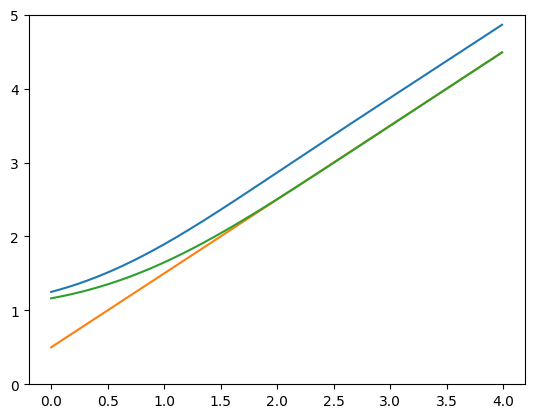

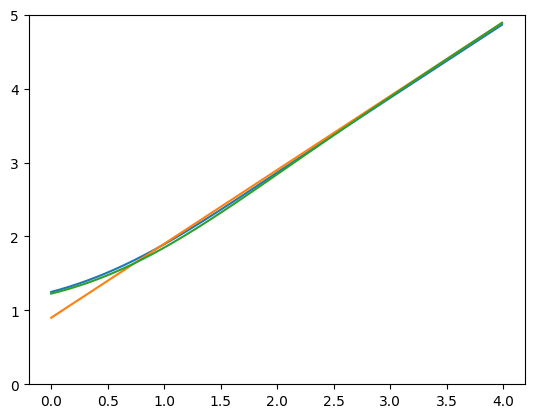

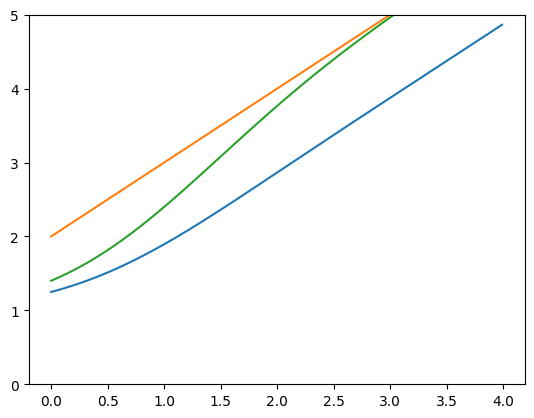

In [445]:
mu = -1
sigma = 1
n = 185

soln = solve_fredholm(k(mu, sigma), f_t(), n)

xmax = 4
x = np.arange(0, xmax, 0.01)

a = 1/2
plt.plot(x, soln(x))
plt.plot(x, -(x/mu) + a)
plt.plot(x, 1 - (sigma/mu)*norm.pdf((x+mu)/sigma) + (- (x/mu) + a - 1)*norm.cdf((x+mu)/sigma))
plt.ylim([0,1 - xmax/mu])
plt.show()

a = 0.9
plt.plot(x, soln(x))
plt.plot(x, -(x/mu) + a)
plt.plot(x, 1 - (sigma/mu)*norm.pdf((x+mu)/sigma) + (- (x/mu) + a - 1)*norm.cdf((x+mu)/sigma))
plt.ylim([0,1 - xmax/mu])
plt.show()

a = 2
plt.plot(x, soln(x))
plt.plot(x, -(x/mu) + a)
plt.plot(x, 1 - (sigma/mu)*norm.pdf((x+mu)/sigma) + (- (x/mu) + a - 1)*norm.cdf((x+mu)/sigma))
plt.ylim([0,1 - xmax/mu])
plt.show()


(0.0, 4.0)

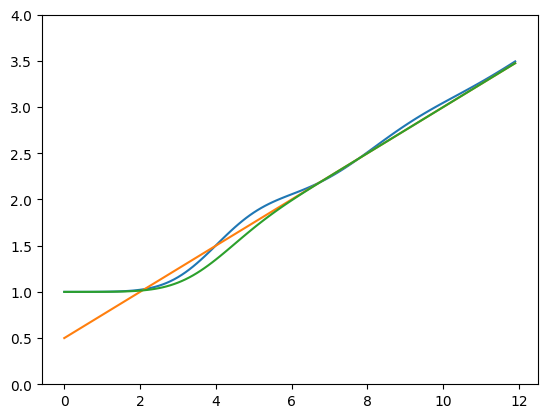

In [378]:
mu = -4
sigma = 1
n = 185

soln = solve_fredholm(k(mu, sigma), f_t(), n)

xmax = 12
x = np.arange(0, xmax, 0.1)

plt.plot(x, soln(x))
a = 1/2
plt.plot(x, -(x/mu) + a)
plt.plot(x, 1 - (sigma/mu)*norm.pdf((x+mu)/sigma) + (- (x/mu) + a - 1)*norm.cdf((x+mu)/sigma))
plt.ylim([0,1 - xmax/mu])

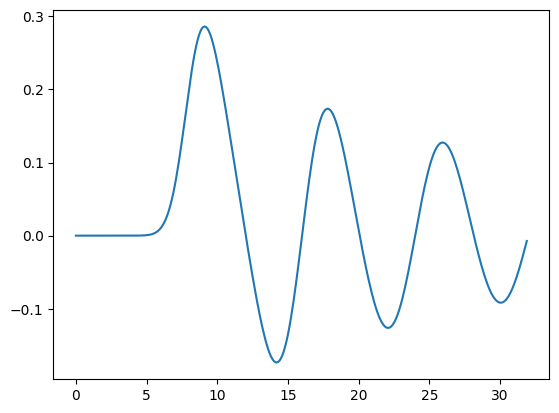

In [342]:
mu = -8
sigma = 1
n = 185

soln = solve_fredholm(k(mu, sigma), f_t(), n)

xmax = 32
x = np.arange(0, xmax, 0.1)
a = 1/2
approx = 1 - (sigma/mu)*norm.pdf((x+mu)/sigma) + (- (x/mu) + a - 1)*norm.cdf((x+mu)/sigma)
plt.plot(x, soln(x) - approx)

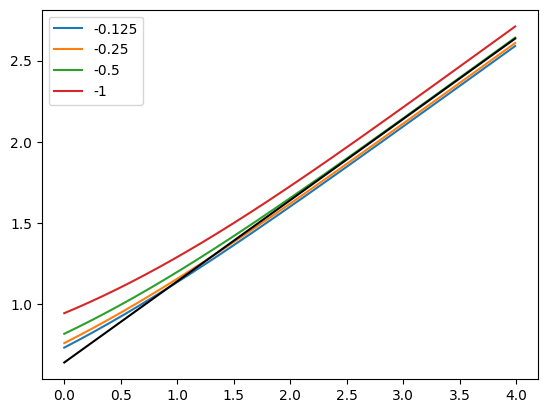

In [496]:
sigma = 2
n = 185
xmax = 4
x = np.arange(0, xmax, 0.01)

for mu in [-1/8, -1/4, -1/2, -1]:
    soln = solve_fredholm(k(mu, sigma), f_t(), n)
    plt.plot(x, -(mu/sigma) * soln(x), label=mu)
plt.plot(x, x/sigma + 0.6410777703680648, 'k')
plt.legend()

0.7978845608028654


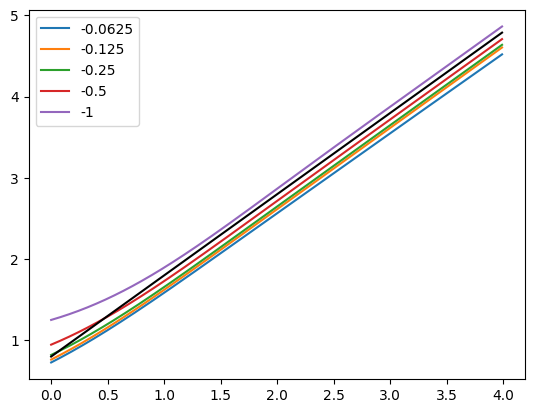

In [515]:
sigma = 1
n = 185
xmax = 4
x = np.arange(0, xmax, 0.01)

for mu in [-1/16, -1/8, -1/4, -1/2, -1]:
    soln = solve_fredholm(k(mu, sigma), f_t(), n)
    plt.plot(x, (-mu/sigma) * soln(x), label=mu)
plt.plot(x, x/sigma + np.sqrt(2/np.pi), 'k')
plt.legend()

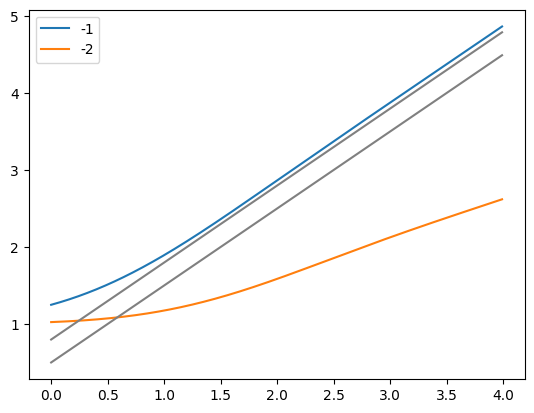

In [535]:
sigma = 1
n = 185
xmax = 4
x = np.arange(0, xmax, 0.01)

for mu in [-1, -2]:
    soln = solve_fredholm(k(mu, sigma), f_t(), n)
    plt.plot(x, soln(x), label=mu)
plt.plot(x, x/sigma + 1/2, '0.5')
plt.plot(x, x/sigma + np.sqrt(2/np.pi), '0.5')
plt.legend()

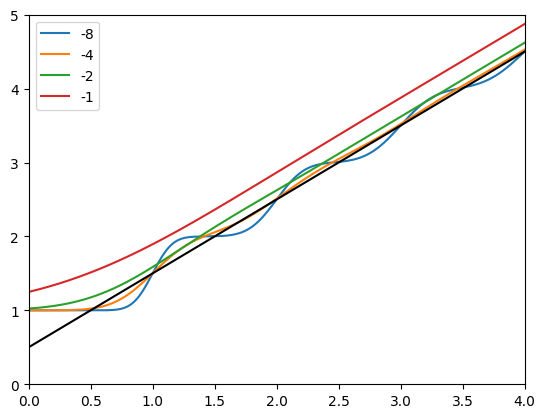

In [508]:
sigma = 1
n = 185
xmax = 32
x = np.arange(0, xmax, 0.01)

for mu in [-8, -4, -2, -1]:
    soln = solve_fredholm(k(mu, sigma), f_t(), n)
    plt.plot(x / (-mu), soln(x), label=mu)

# plt.plot(x, np.ceil(x), 'k')
plt.plot(x, (1/2) + x, 'k')
plt.xlim([0,4])
plt.ylim([0,5])
plt.legend()

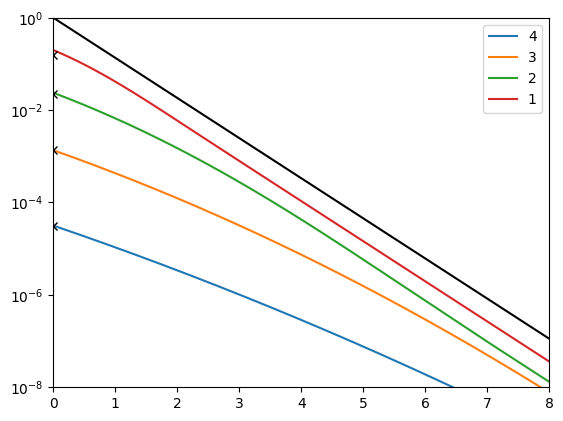

In [566]:
sigma = 1
n = 185
xmax = 32
x = np.arange(0, xmax, 0.01)

for mu in [4, 3, 2, 1]:
    soln = solve_fredholm(k(mu, sigma), f_nt(mu, sigma), n)
    plt.semilogy(mu * x / sigma**2 , soln(x), label=mu)
    plt.plot(0, norm.cdf(-mu/sigma), 'kx')
plt.semilogy(x, np.exp(-2*x), 'k')
# plt.plot(x, np.ceil(x), 'k')
# plt.plot(x, (1/2) + x, 'k')
plt.xlim([0,8])
plt.ylim([1e-8,1])
plt.legend()

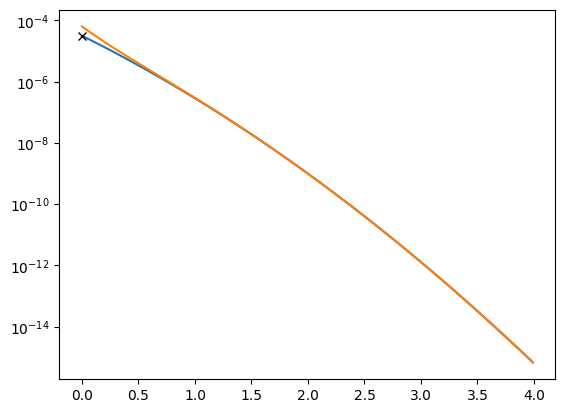

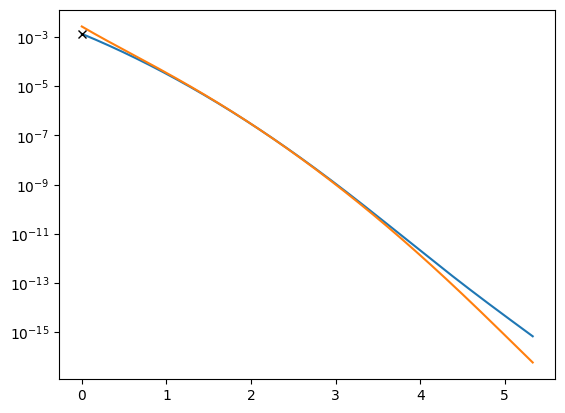

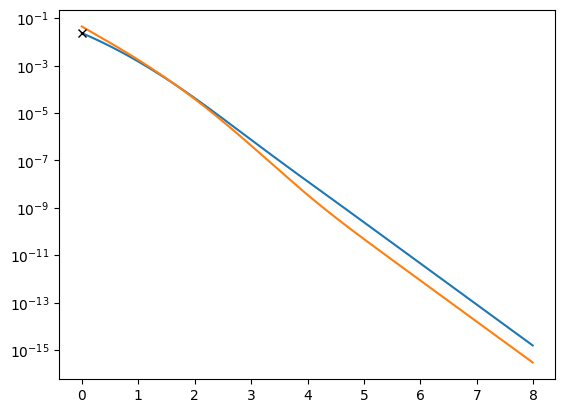

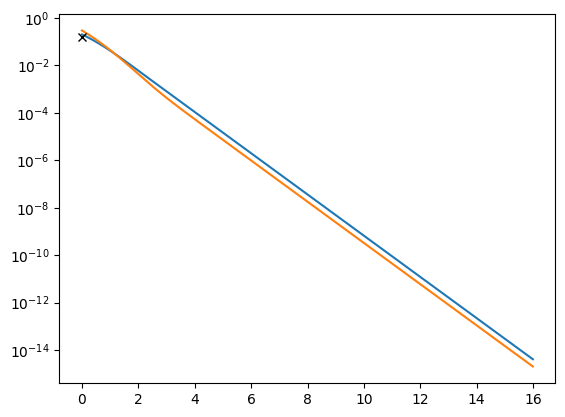

In [586]:
sigma = 1
n = 185

for mu in [4, 3, 2, 1]:
    xmax = 16
    x = np.arange(0, xmax / mu, 0.01)

    soln = solve_fredholm(k(mu, sigma), f_nt(mu, sigma), n)
    plt.semilogy(x, soln(x), label=mu)
    plt.semilogy(x, norm.cdf(-mu/sigma)*(1 - norm.cdf(-(mu+x)/sigma))*np.exp(-2 * mu * x / sigma**2) + norm.cdf(-(mu+x)/sigma))
    plt.plot(0, norm.cdf(-mu/sigma), 'kx')
    plt.show()

## Scaling diagrams

In [619]:
n = 185
sigma = 1

### Non-threat, $|\mu / \sigma| \leq 1$

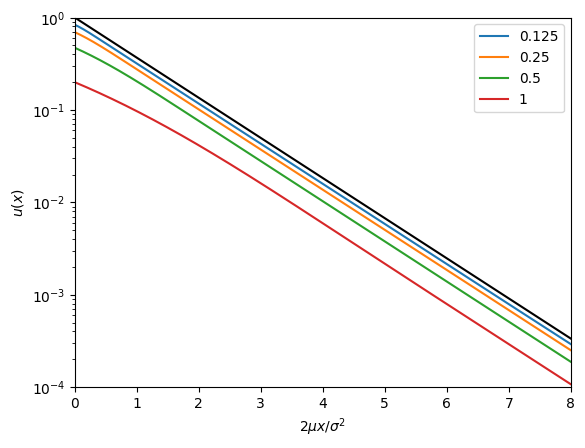

In [702]:
xmax = 32
x = np.arange(0, xmax, 0.01)

for mu in [1/8, 1/4, 1/2, 1]:
    soln = solve_fredholm(k(mu, sigma), f_nt(mu, sigma), n)
    plt.semilogy(2 * mu * x / sigma**2, soln(x), label=mu)
plt.semilogy(x, np.exp(- x), 'k')
plt.xlim([0, 8])
plt.ylim([1e-4,1])
plt.xlabel(r"$2 \mu x / \sigma^2$")
plt.ylabel(r"$u(x)$")
plt.legend()

### Threat, $|\mu / \sigma| \le 1$

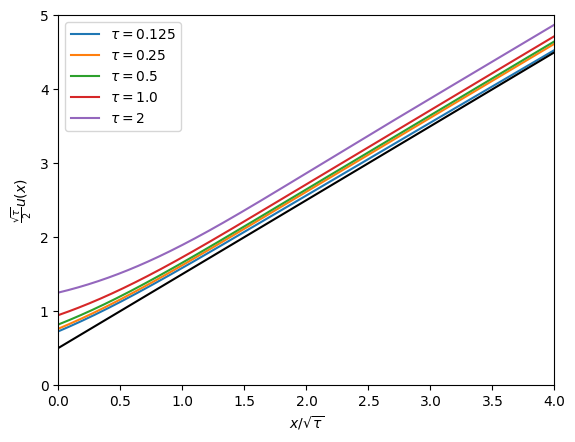

In [815]:
xmax = 32
x = np.arange(0, xmax, 0.01)

for mu in [-1/16, -1/8, -1/4, -1/2, -1]:
    soln = solve_fredholm(k(mu, sigma), f_t(), n)
    plt.plot(x / sigma, soln(x) * (-mu / sigma), label=r"$\tau = $" + f"{-2*mu}")
plt.plot(x, x + 0.5, 'k')
plt.xlim([0, 4])
plt.ylim([0, 5])
plt.xlabel(r"$x / \sqrt{\tau}$")
plt.ylabel(r"$\frac{\sqrt{\tau}}{2} u(x)$")
plt.legend()

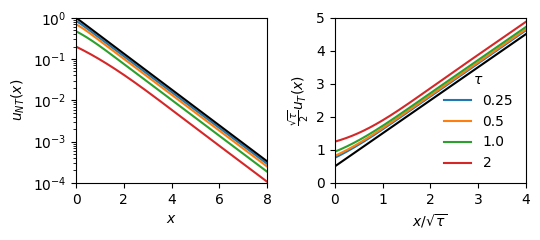

In [837]:
xmax = 32
x = np.arange(0, xmax, 0.01)

fig = plt.figure(figsize=(5.5,2.5))

ax = plt.subplot(122)
for mu in [-1/8, -1/4, -1/2, -1]:
    soln = solve_fredholm(k(mu, sigma), f_t(), n)
    plt.plot(x / sigma, soln(x) * (-mu / sigma), label=f"{-2*mu}")
plt.plot(x, x + 0.5, 'k')
plt.xlim([0, 4])
plt.ylim([0, 5])
plt.xlabel(r"$x / \sqrt{\tau}$")
plt.ylabel(r"$\frac{\sqrt{\tau}}{2} u_{T}(x)$")
plt.legend(frameon=False, title=r"$\tau$")


xmax = 32
x = np.arange(0, xmax, 0.01)

ax = plt.subplot(121)
for mu in [1/8, 1/4, 1/2, 1]:
    soln = solve_fredholm(k(mu, sigma), f_nt(mu, sigma), n)
    plt.semilogy(2 * mu * x / sigma**2, soln(x), label=mu)
plt.semilogy(x, np.exp(- x), 'k')
plt.xlim([0, 8])
plt.ylim([1e-4,1])
plt.xlabel(r"$x$")
plt.ylabel(r"$u_{NT}(x)$")

fig.tight_layout()
plt.savefig("small_updates.png", bbox_inches="tight")
# plt.legend()

### Threat, $|\mu / \sigma| \ge 1$

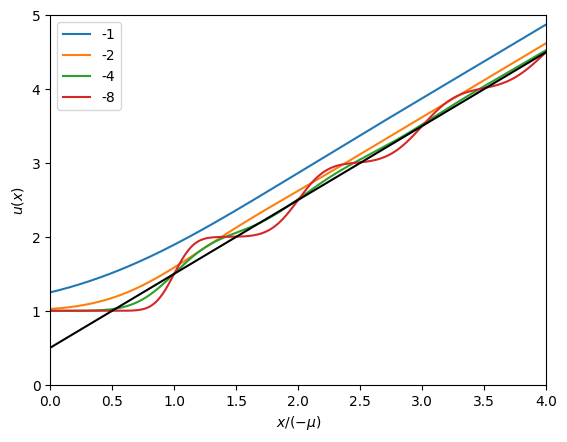

In [683]:
xmax = 32
x = np.arange(0, xmax, 0.01)

for mu in [-1, -2, -4, -8]:
    soln = solve_fredholm(k(mu, sigma), f_t(), n)
    plt.plot(x / (-mu), soln(x), label=mu)
plt.plot(x, x + 0.5, 'k')
plt.xlim([0, 4])
plt.ylim([0, 5])
plt.xlabel(r"$x / (-\mu)$")
plt.ylabel(r"$u(x)$")
plt.legend()

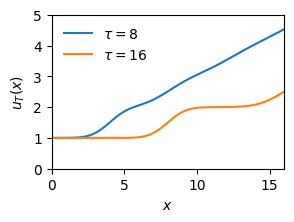

In [804]:
xmax = 16
x = np.arange(0, xmax, 0.01)

plt.figure(figsize=(3,2))
for mu in [-4, -8]:
    soln = solve_fredholm(k(mu, sigma), f_t(), n)
    plt.plot(x, soln(x), label=r"$\tau = $" + f"{-2 * mu}")
plt.xlim([0, xmax])
plt.ylim([0, 5])
plt.xlabel(r"$x$")
plt.ylabel(r"$u_T(x)$")
plt.legend(frameon=False)
plt.savefig("u_T.png", bbox_inches="tight")

### Non-threat, $|\mu / \sigma| \ge 1$

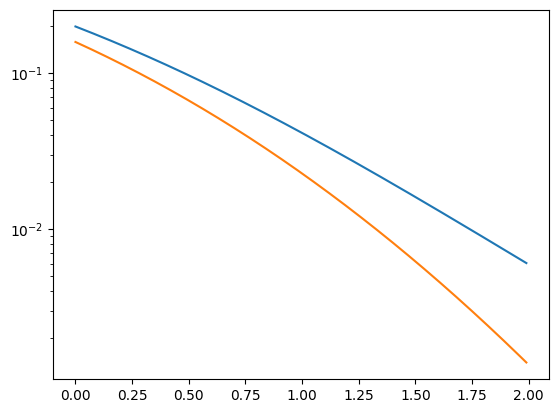

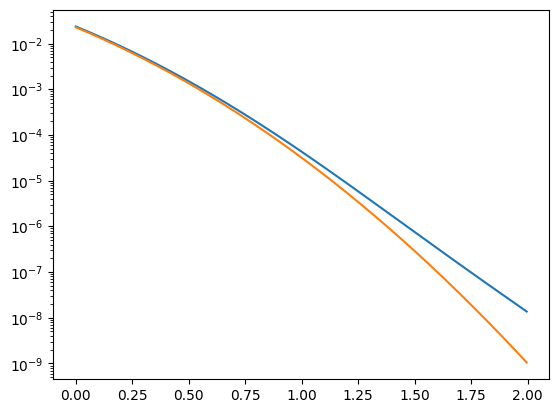

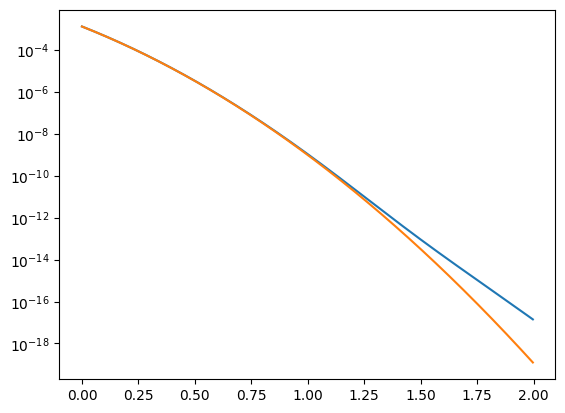

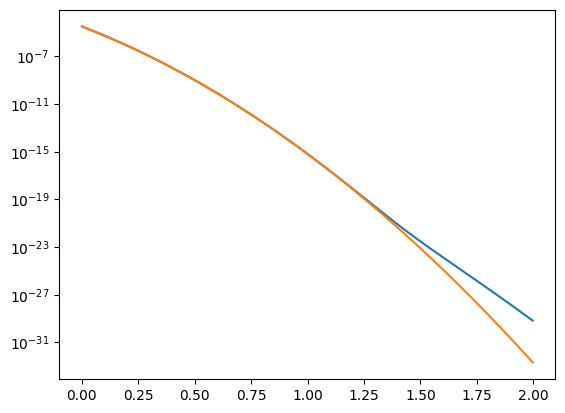

In [623]:
for mu in [1, 2, 3, 4]:
    xmax = 2*mu
    x = np.arange(0, xmax, 0.01)

    soln = solve_fredholm(k(mu, sigma), f_nt(mu, sigma), n)
    plt.semilogy(x / mu, soln(x), label=mu)
    plt.semilogy(x / mu, norm.cdf(-(x+mu)/sigma))
    plt.show()

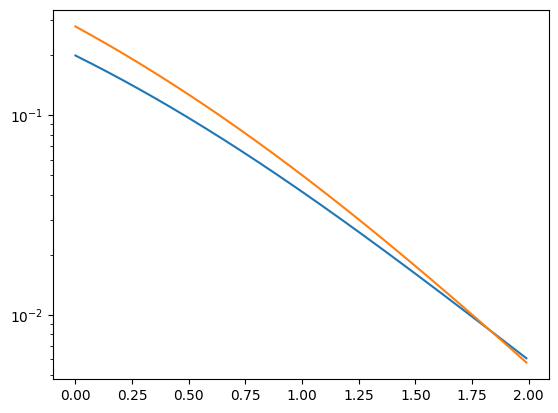

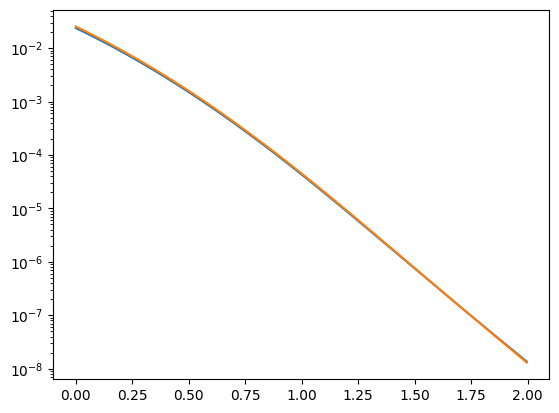

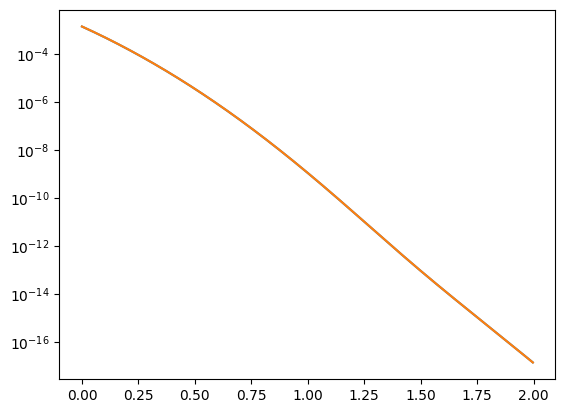

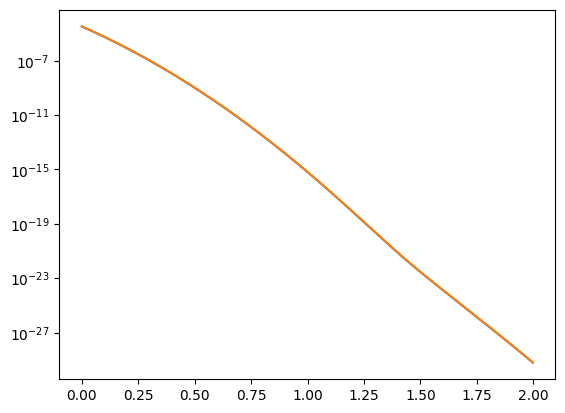

In [762]:
for mu in [1, 2, 3, 4]:
    xmax = 2*mu
    x = np.arange(0, xmax, 0.01)

    soln = solve_fredholm(k(mu, sigma), f_nt(mu, sigma), n)
    approx = np.zeros_like(x)
    for j in range(1, 4):
        approx += norm.cdf(-(x + j * mu)/(np.sqrt(j) * sigma))
    plt.semilogy(x / mu, soln(x), label=mu)
    plt.semilogy(x / mu, approx)
    plt.show()

## End scaling diagrams

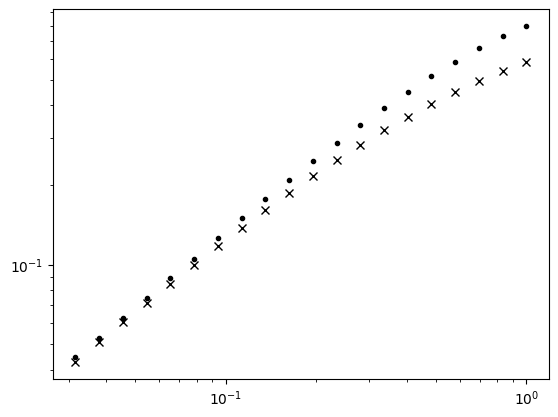

In [735]:
for mu in np.logspace(-1.5, 0, 20):
    soln = solve_fredholm(k(mu, sigma), f_nt(mu, sigma), n)
    plt.loglog(mu, 1 - soln(np.zeros(1)), '.k')
    plt.loglog(mu, 1 - 1 / (1 + np.sqrt(2)*mu), 'xk')

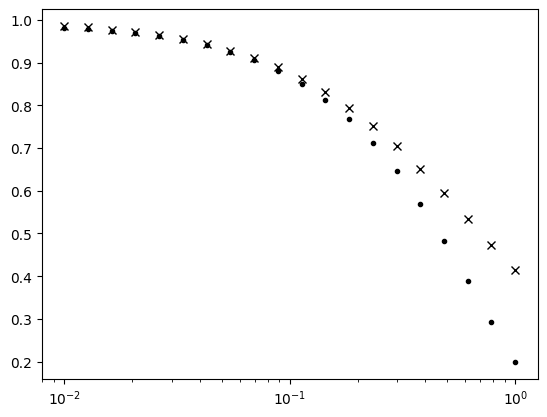

In [739]:
for mu in np.logspace(-2, 0, 20):
    soln = solve_fredholm(k(mu, sigma), f_nt(mu, sigma), n)
    plt.semilogx(mu, soln(np.zeros(1)), '.k')
    plt.semilogx(mu, 1 / (1 + np.sqrt(2)*mu), 'xk')

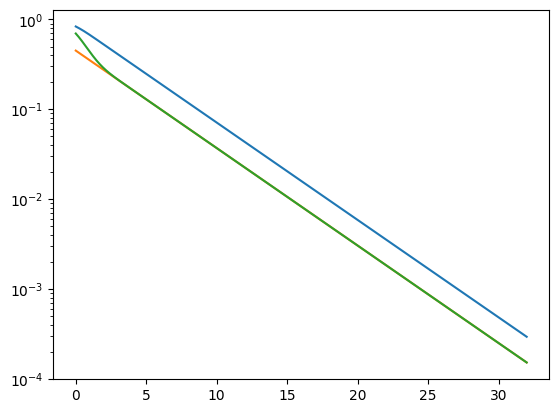

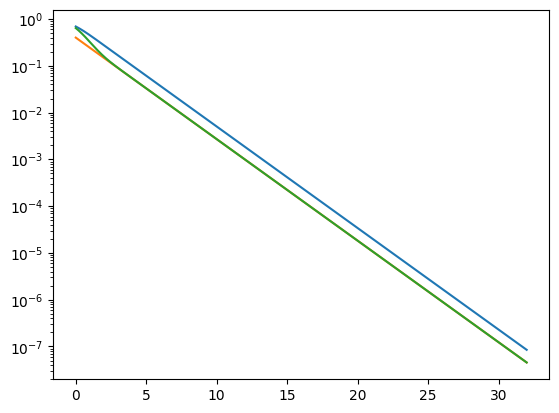

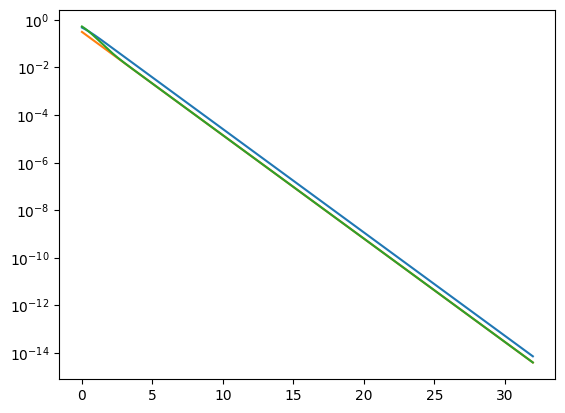

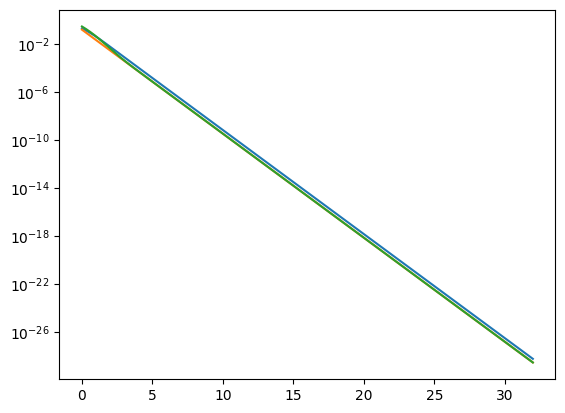

In [677]:
xmax = 32
x = np.arange(0, xmax, 0.01)

for mu in [1/8, 1/4, 1/2, 1]:
    a = norm.cdf(-mu / sigma)
    soln = solve_fredholm(k(mu, sigma), f_nt(mu, sigma), n)
    plt.semilogy(x, soln(x), label=mu)
    plt.semilogy(x, a * np.exp(-2 * mu * x / sigma**2))
    plt.semilogy(x, a * norm.sf(-(x+mu)/sigma) * np.exp(-2 * mu * x / sigma**2) + norm.cdf(-(x+mu)/sigma))
    # plt.semilogy(x, np.exp(-2 * x), 'k')
    # plt.xlim([0,4])
    # plt.ylim([3e-3,1.1])
    plt.show()

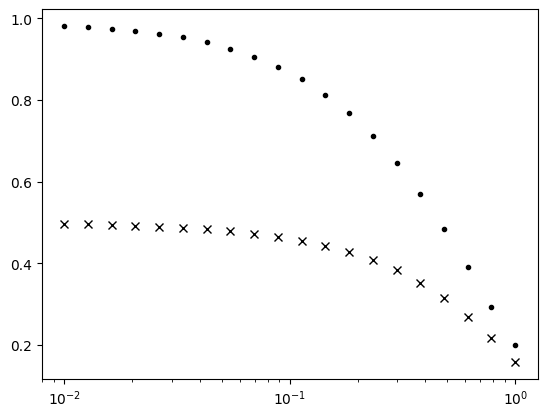

In [645]:
for mu in np.logspace(-2, 0, 20):
    soln = solve_fredholm(k(mu, sigma), f_nt(mu, sigma), n)
    plt.semilogx(mu, soln(np.zeros(1)), '.k')
    plt.semilogx(mu, norm.cdf(-mu / sigma), 'xk')

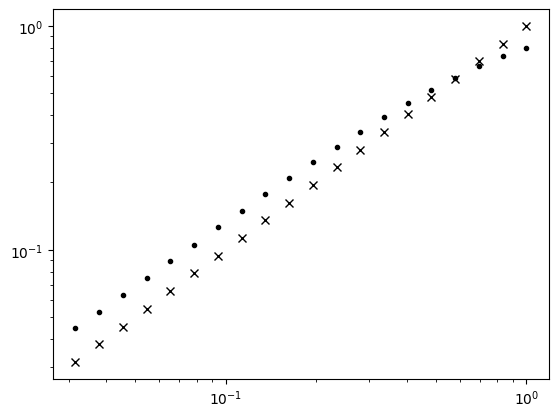

In [734]:
for mu in np.logspace(-1.5, 0, 20):
    soln = solve_fredholm(k(mu, sigma), f_nt(mu, sigma), n)
    plt.loglog(mu, 1 - soln(np.zeros(1)), '.k')
    plt.loglog(mu, mu, 'xk')
    # plt.semilogx(mu, norm.cdf(-mu / sigma), 'xk')

(0.0, 33.0)

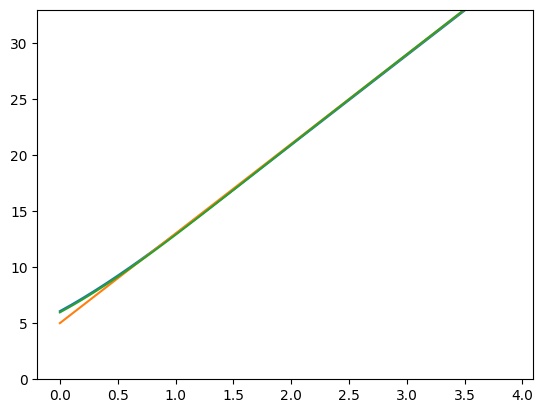

In [374]:
mu = -1/8
sigma = 1
n = 185

soln = solve_fredholm(k(mu, sigma), f_t(), n)

xmax = 4
x = np.arange(0, xmax, 0.1)

plt.plot(x, soln(x))
a = 2 * np.sqrt(2*np.pi)
plt.plot(x, -(x/mu) + a)
plt.plot(x, 1 - (sigma/mu)*norm.pdf((x+mu)/sigma) + (- (x/mu) + a - 1)*norm.cdf((x+mu)/sigma))
plt.ylim([0,1 - xmax/mu])

In [372]:
np.sqrt(2*np.pi)

2.5066282746310002

(0.0, 17.0)

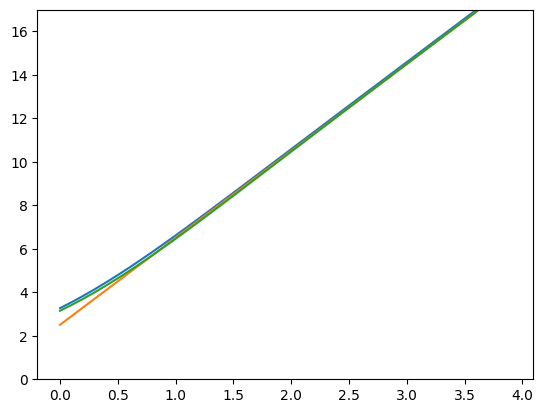

In [373]:
mu = -1/4
sigma = 1
n = 185

soln = solve_fredholm(k(mu, sigma), f_t(), n)

xmax = 4
x = np.arange(0, xmax, 0.1)

plt.plot(x, soln(x))
a = np.sqrt(2*np.pi)
plt.plot(x, -(x/mu) + a)
plt.plot(x, 1 - (sigma/mu)*norm.pdf((x+mu)/sigma) + (- (x/mu) + a - 1)*norm.cdf((x+mu)/sigma))
plt.ylim([0,1 - xmax/mu])

(0.0, 9.0)

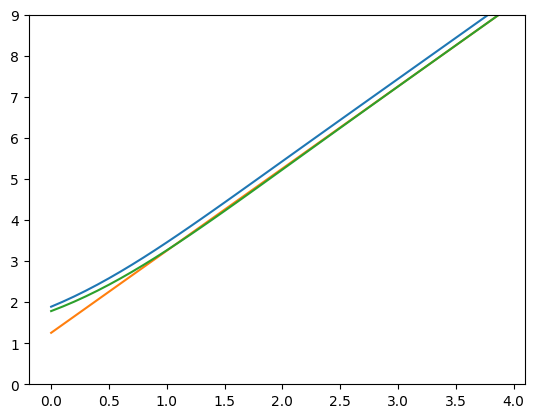

In [375]:
mu = -1/2
sigma = 1
n = 185

soln = solve_fredholm(k(mu, sigma), f_t(), n)

xmax = 4
x = np.arange(0, xmax, 0.1)

plt.plot(x, soln(x))
a = np.sqrt(2*np.pi) / 2
plt.plot(x, -(x/mu) + a)
plt.plot(x, 1 - (sigma/mu)*norm.pdf((x+mu)/sigma) + (- (x/mu) + a - 1)*norm.cdf((x+mu)/sigma))
plt.ylim([0,1 - xmax/mu])

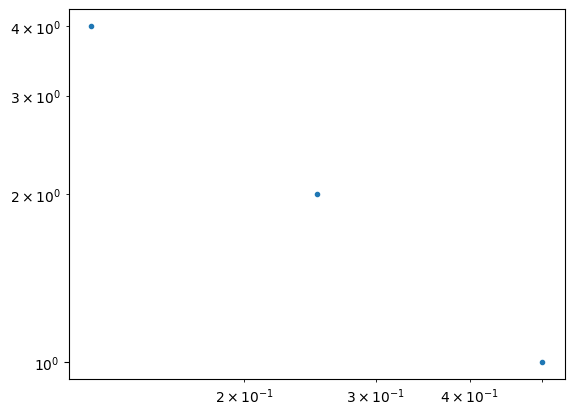

In [362]:
plt.loglog([1/2, 1/4, 1/8], [1, 2, 4], '.')

(0.0, 65.0)

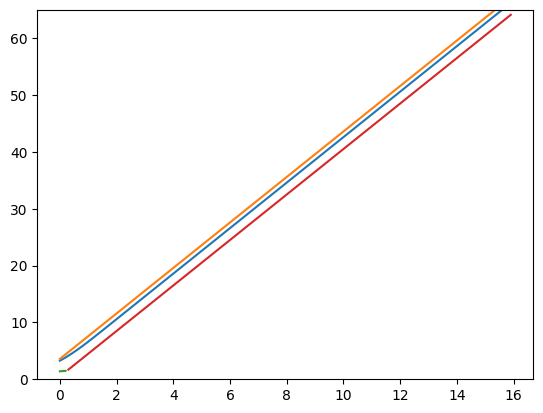

In [277]:
mu = -1/4
sigma = 1
n = 185

soln = solve_fredholm(k(mu, sigma), f_t(), n)

xmax = 16
x = np.arange(0, xmax, 0.1)

plt.plot(x, soln(x))
plt.plot(x, theory_t(x, mu, sigma))
plt.plot(x[x<=-mu], 1 + norm.cdf((x[x<=-mu]+mu)/sigma))
plt.plot(x[x>=-mu], -x[x>=-mu]/mu + 1/2)
plt.ylim([0,1 - xmax/mu])

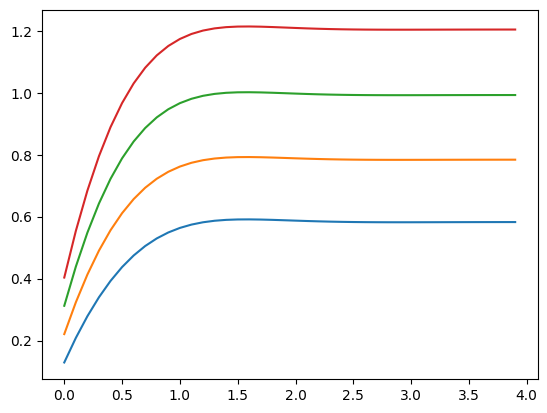

In [287]:
sigma = 1
n = 185
xmax = 4
x = np.arange(0, xmax, 0.1)

for mu in [-1/2, -1/3, -1/4, -1/5]:
    soln = solve_fredholm(k(mu, sigma), f_t(), n)
    plt.plot(x, (theory_t(x, mu, sigma) - soln(x)))

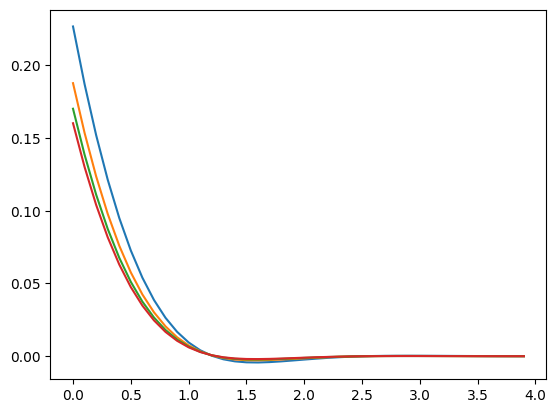

In [294]:
sigma = 1
n = 185
xmax = 4
x = np.arange(0, xmax, 0.1)

for mu in [-1/2, -1/3, -1/4, -1/5]:
    soln = solve_fredholm(k(mu, sigma), f_t(), n)
    mod = soln(x) * -mu - x
    plt.plot(x, mod - mod[-1])
    # plt.plot(x, theory_t(x, mu, sigma) * -mu)

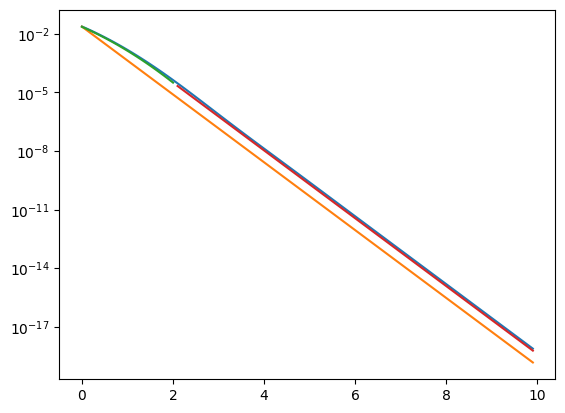

In [268]:
mu = 2
sigma = 1
n = 185

soln = solve_fredholm(k(mu, sigma), f_nt(mu, sigma), n)

xmax = 10
x = np.arange(0, xmax, 0.1)

plt.semilogy(x, soln(x))
# plt.plot(x, 1 + norm.cdf((x+mu)/sigma))
# plt.plot(x, 1 - x/mu)
plt.semilogy(x, theory_nt(x, mu, sigma))
plt.semilogy(x[x<=mu], norm.cdf(-(x[x<=mu]+mu)/sigma))
plt.semilogy(x[x>mu], np.exp(2*(mu/sigma)**2) * norm.cdf(-2*mu/sigma) * np.exp(-2*mu * x[x>mu] / sigma**2))
# plt.plot(x, -x/mu + norm.cdf(0))
# plt.ylim([0,1 - xmax/mu])

/var/folders/dv/_dgh3jnn7kn32ndcd117mg5m0000gn/T/ipykernel_70291/1233660818.py:2: RuntimeWarning: overflow encountered in exp
  plt.loglog(x, np.exp(2*x**2) * norm.cdf(-2*x))
/var/folders/dv/_dgh3jnn7kn32ndcd117mg5m0000gn/T/ipykernel_70291/1233660818.py:2: RuntimeWarning: invalid value encountered in multiply
  plt.loglog(x, np.exp(2*x**2) * norm.cdf(-2*x))


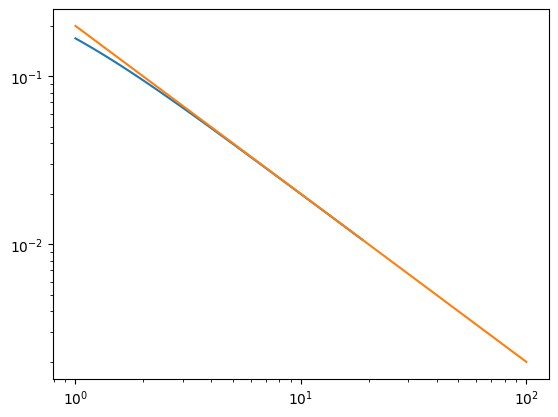

In [230]:
x = np.logspace(0, 2, 100)
plt.loglog(x, np.exp(2*x**2) * norm.cdf(-2*x))
plt.loglog(x, 1/(2*np.sqrt(2*np.pi)*x))

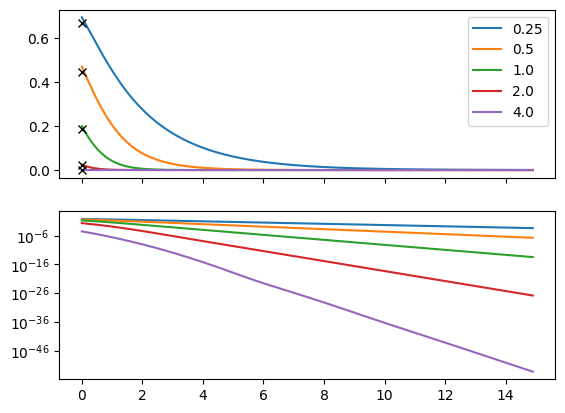

In [143]:
sigma = 1
n = 185
xmax = 15
x = np.arange(0, xmax, 0.1)

fig, axes = plt.subplots(2, 1, sharex=True)
for mu in np.logspace(-2, 2, 5, base=2):
    k = lambda x, t: norm(loc=mu, scale=sigma).pdf(t - x)
    f = norm(loc=-mu, scale=sigma).sf
    soln = solve_fredholm(k, f, n)

    axes[0].plot(x, soln(x), label=mu)
    axes[1].semilogy(x, soln(x))
    axes[0].plot(0, norm.cdf(-mu/sigma) / norm.cdf(mu/sigma),'xk')
axes[0].legend()

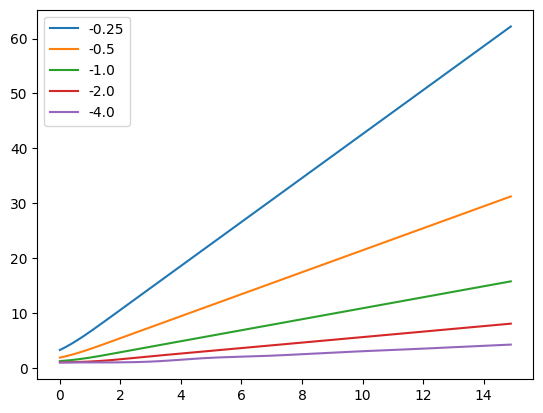

In [38]:
sigma = 1
n = 185
xmax = 15
x = np.arange(0, xmax, 0.1)

fig, ax = plt.subplots(1, 1, sharex=True)
for mu in -np.logspace(-2, 2, 5, base=2):
    k = lambda x, t: norm(loc=mu, scale=sigma).pdf(t - x)
    f = np.ones_like
    soln = solve_fredholm(k, f, n)

    ax.plot(x, soln(x), label=mu)
ax.legend()

/var/folders/dv/_dgh3jnn7kn32ndcd117mg5m0000gn/T/ipykernel_70291/3658081208.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.loglog(-x, -(1/x)*norm.pdf(x/2) / norm.cdf(-x/2))


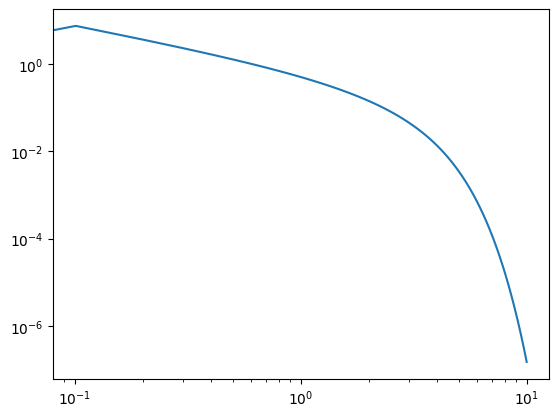

In [448]:
x = np.linspace(-10, 0, 100)
plt.loglog(-x, -(1/x)*norm.pdf(x/2) / norm.cdf(-x/2))

In [141]:
norm

In [450]:
norm.pdf(1/2) / norm.cdf(-1/2) - 1/2

0.6410777703680648

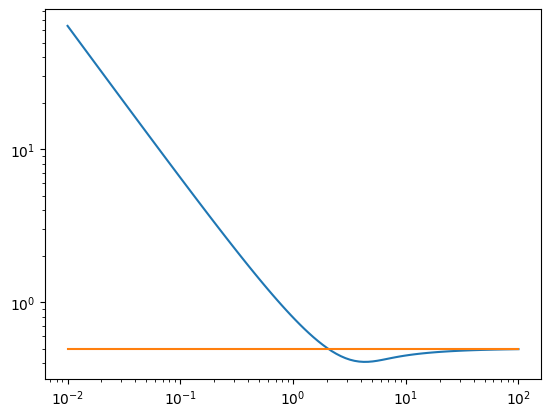

In [458]:
x = - np.logspace(-2, 2, 100)
plt.loglog(-x, 1/2 + 1/(2*x) - (1/x)*norm.pdf(1/2 + x/2) / norm.cdf(-(1/2 + x/2)))
plt.loglog(-x, 1/2*np.ones_like(x))